In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy as sc
import datetime
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [62]:
FMT = '%H:%M:%S'

#### V entrada = 30v
#### V frenado = 1,5v
#### T inicio = 200oC
#### T final = 208oC

In [63]:
data = pd.read_csv("1",sep=';')

#### me quedo con las filas a partir de la 111 que es donde arranca la cuenta

In [64]:
data = data.loc[111::]
data = data[['Time','Value']]
data = data.reset_index()

data['t'] = 0

In [65]:
data['Time'] =  pd.to_datetime(data['Time'], format = FMT) # transfrom string to datetime
for i in range(data.shape[0] - 1):
    data['t'][i+1] = ((data['Time'][i+1] - data['Time'][i]))



C:\Users\aguss\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
def delta_t(x):
    x = str(x)
    x = x.split(' ')
    x = x[-1].split(':')
    return int(x[-1])

In [67]:
data['t'] = data.apply(lambda x: delta_t(x['t']),axis=1)

In [68]:
data = data[['Value','t']]

In [69]:
data = data.query('t > 0')

In [70]:
data['t'] = data['t'].cumsum()

In [71]:
data['Va'] = 0.000

In [72]:
def calcular_Va(Vo,Vc,t):
    x = 0.000
    e = 0.000
    e = np.exp((-t)/22)
    x = Vo*(1-100/101 * e)
    return x

In [73]:
Vo = 30
Vc = 0
data['Va'] = data.apply(lambda x: calcular_Va(Vo,Vc,x['t']), axis = 1)

In [76]:
data.rename(columns={'Value':'I'},inplace=True)

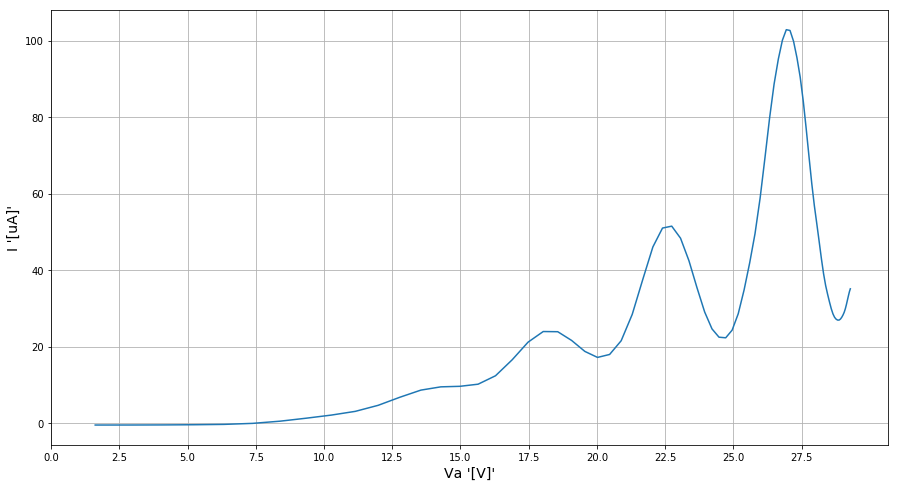

In [97]:
ysmoothed = gaussian_filter1d(data['I'], sigma=1)
graph = data[['I','Va']]
plt.figure(figsize=(15,8))
plt.xlabel("Va '[V]'", fontsize=14)
plt.ylabel("I '[uA]'", fontsize=14)
plt.plot(graph['Va'], ysmoothed)
xmarks=np.arange(0,30,2.5)
plt.xticks(xmarks)
plt.grid(True)
plt.show()


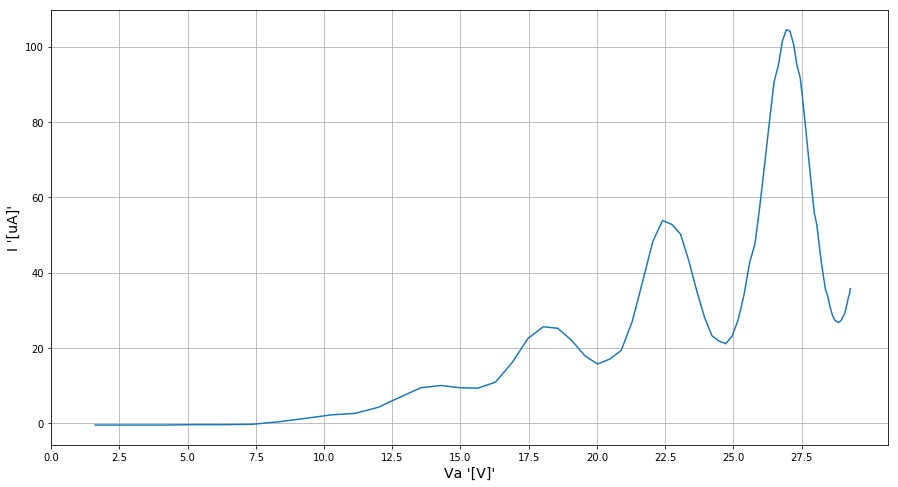

In [78]:
plt.figure(figsize=(15,8))
plt.plot(graph['Va'],graph['I'])
plt.xlabel("Va '[V]'", fontsize=14)
plt.ylabel("I '[uA]'", fontsize=14)
xmarks=np.arange(0,30,2.5)
plt.xticks(xmarks)
plt.grid(True)
plt.show()

#### V entrada = 50v
#### V frenado = 1,5v
#### T inicio = 200oC
#### T final = 210oC

In [98]:
data = pd.read_csv("2",sep=';')
data = data.loc[30::]
data = data[['Time','Value','Unit']]
data = data.reset_index()
data['t'] = 0
data['Time'] =  pd.to_datetime(data['Time'], format = FMT) # transfrom string to datetime
for i in range(data.shape[0] - 1):
    data['t'][i+1] = ((data['Time'][i+1] - data['Time'][i]))

C:\Users\aguss\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
data['t'] = data.apply(lambda x: delta_t(x['t']),axis=1)
data = data[['Value','t']]
data = data.query('t > 0')
data['t'] = data['t'].cumsum()
data['Va'] = 0.000

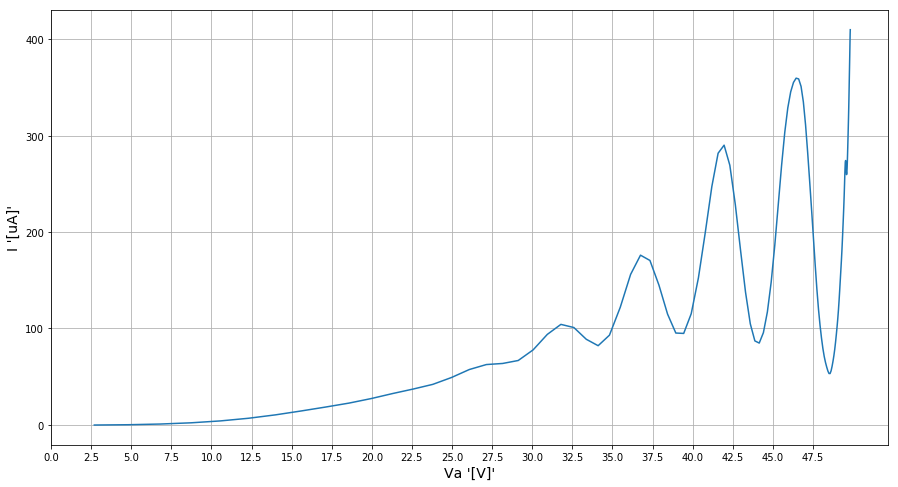

In [108]:
Vo = 50
Vc = 0
data['Va'] = data.apply(lambda x: calcular_Va(Vo,Vc,x['t']), axis = 1)
data.rename(columns={'Value':'I'},inplace=True)
graph = data[['I','Va']]

ysmoothed = gaussian_filter1d(data['I'], sigma=1.5)
graph = data[['I','Va']]
plt.figure(figsize=(15,8))
plt.xlabel("Va '[V]'", fontsize=14)
plt.ylabel("I '[uA]'", fontsize=14)
plt.plot(graph['Va'], ysmoothed)
xmarks=np.arange(0,50,2.5)
plt.xticks(xmarks)
plt.grid(True)
plt.show()


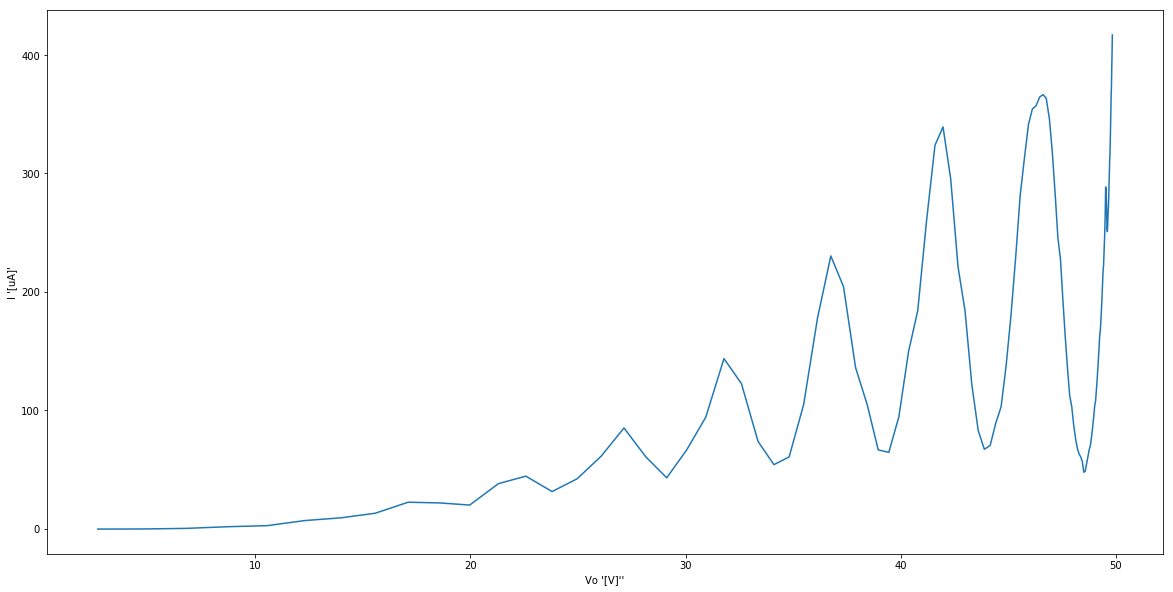

In [101]:
plt.figure(figsize=(20,10))
plt.plot(graph['Va'],graph['I'],'')
plt.xlabel("Vo '[V]''")
plt.ylabel("I '[uA]'")
plt.show()

#### V entrada = 30v
#### V frenado = 2,5v
#### T inicio = 200oC
#### T final = 205oC

In [109]:
data = pd.read_csv("3",sep=';')
data = data.loc[38::]
data = data[['Time','Value']]
data = data.reset_index()
data['t'] = 0
data['Time'] =  pd.to_datetime(data['Time'], format = FMT) # transfrom string to datetime
for i in range(data.shape[0] - 1):
    data['t'][i+1] = ((data['Time'][i+1] - data['Time'][i]))
data['t'] = data.apply(lambda x: delta_t(x['t']),axis=1)
data = data[['Value','t']]
data = data.query('t > 0')
data['t'] = data['t'].cumsum()
data['Va'] = 0.000

C:\Users\aguss\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
Vo = 30
Vc = 0
data['Va'] = data.apply(lambda x: calcular_Va(Vo,Vc,x['t']), axis = 1)
data.rename(columns={'Value':'I'},inplace=True)
graph = data[['I','Va']]

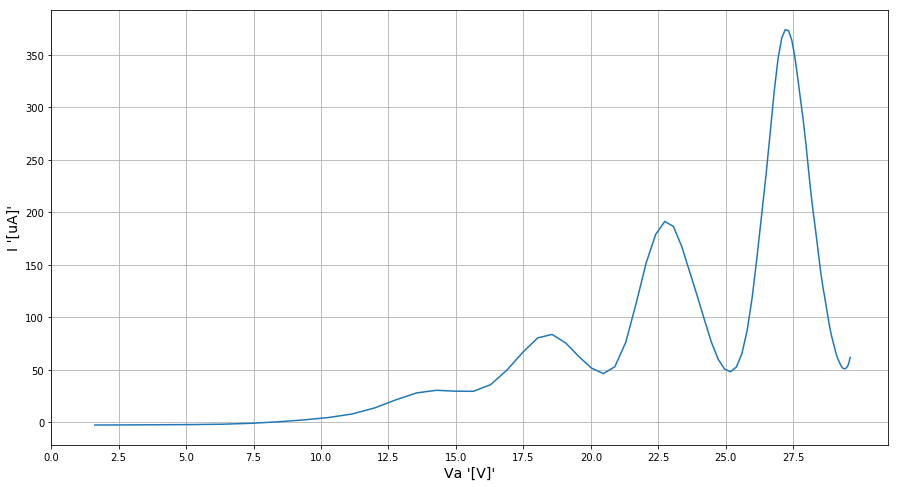

In [111]:
ysmoothed = gaussian_filter1d(data['I'], sigma=1)
graph = data[['I','Va']]
plt.figure(figsize=(15,8))
plt.xlabel("Va '[V]'", fontsize=14)
plt.ylabel("I '[uA]'", fontsize=14)
plt.plot(graph['Va'], ysmoothed)
xmarks=np.arange(0,30,2.5)
plt.xticks(xmarks)
plt.grid(True)
plt.show()


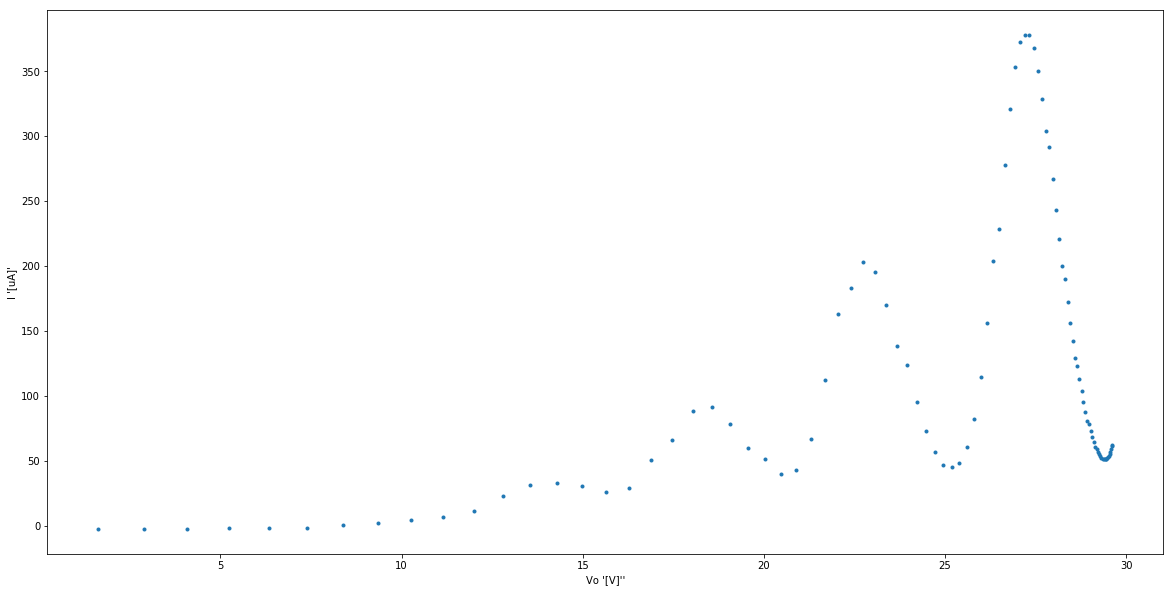

In [112]:
plt.figure(figsize=(20,10))
plt.plot(graph['Va'],graph['I'],'.')
plt.xlabel("Vo '[V]''")
plt.ylabel("I '[uA]'")
plt.show()

#### V entrada = 30v
#### V frenado = 1,5v
#### T inicio = 135oC
#### T final = 140oC

In [113]:
data = pd.read_csv("4",sep=';')
data = data.loc[25::]
data = data[['Time','Value','Unit']]
data = data.reset_index()
data['t'] = 0
data['Time'] =  pd.to_datetime(data['Time'], format = FMT) # transfrom string to datetime
for i in range(data.shape[0] - 1):
    data['t'][i+1] = ((data['Time'][i+1] - data['Time'][i]))
data['t'] = data.apply(lambda x: delta_t(x['t']),axis=1)
data = data[['Value','t','Unit']]
data = data.query('t > 0')
data['t'] = data['t'].cumsum()
data['Va'] = 0.000

C:\Users\aguss\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
def unidades(x):
    if x[2] == "uA":
        return x[0]
    else:
        return str(float(x[0])*1000)

In [115]:
data = data[(data.Value != '0L')]
data['Value'] = data.apply(lambda x: unidades(x),axis=1)


In [118]:
Vo = 30
Vc = 0
data['Va'] = data.apply(lambda x: calcular_Va(Vo,Vc,x['t']), axis = 1)
data.rename(columns={'Value':'I'},inplace=True)
graph = data[['I','Va']]

RuntimeError: array type dtype('O') not supported

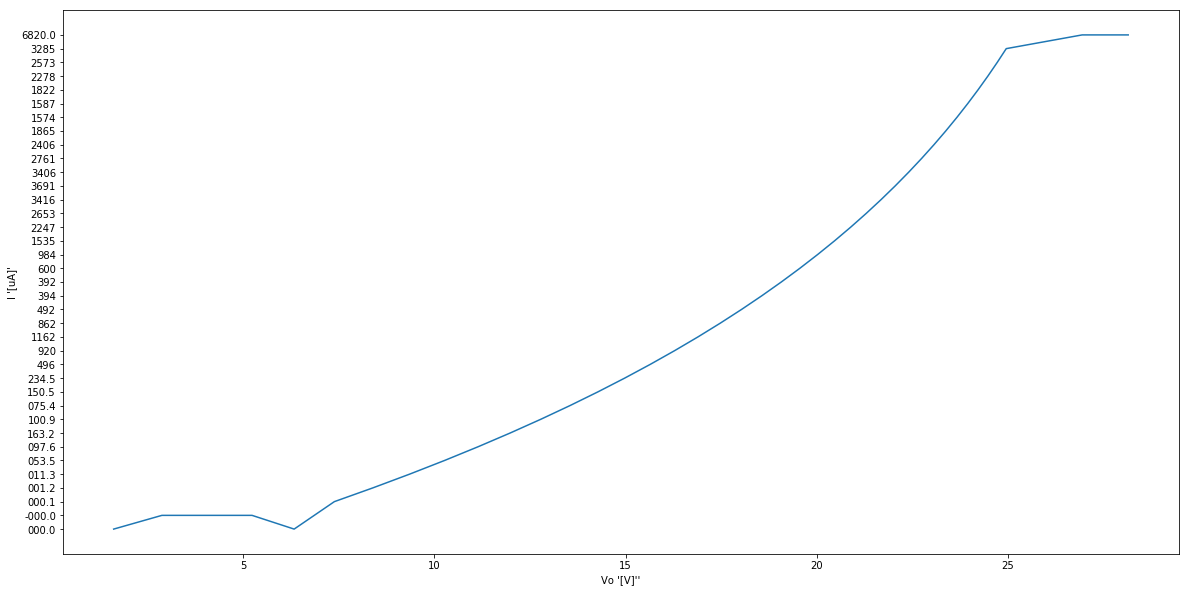

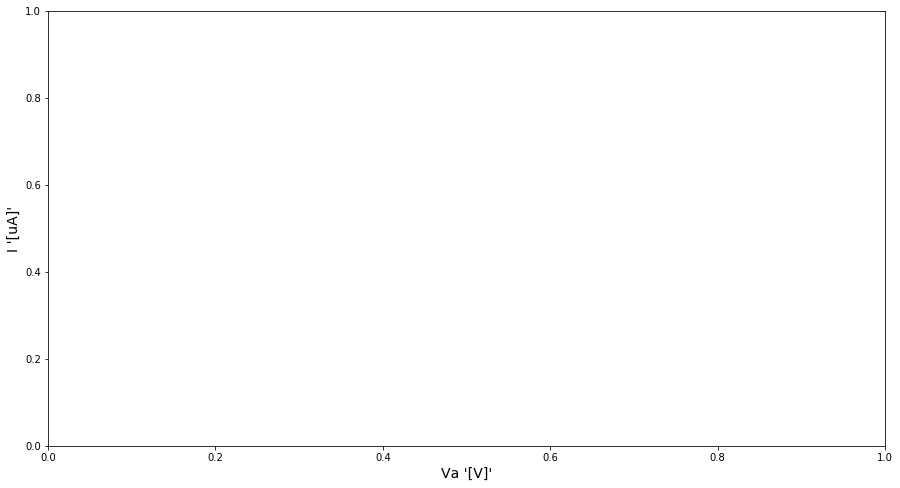

In [121]:
plt.figure(figsize=(20,10))
plt.plot(graph['Va'],graph['I'],)
plt.xlabel("Vo '[V]''")
plt.ylabel("I '[uA]'")
plt.figure(figsize=(15,8))
plt.xlabel("Va '[V]'", fontsize=14)
plt.ylabel("I '[uA]'", fontsize=14)
plt.show()